Project Title: Profitability Optimization and Sales Performance Analysis for Superstore

Problem Statement:
Superstore operates across multiple regions and offers various product categories to a diverse customer base. Despite high sales volumes, certain segments show declining profitability—likely due to discounting strategies, poor shipping efficiency, or unbalanced product demand.

Objectives: 
1. To analyze sales and profitability by product category, region, and customer segment.

2. To identify loss-making products and regions.

3. To evaluate the effectiveness of discounts and shipping methods on sales and profit.

In [211]:
#Import the necessaries libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [212]:
#Load the dataset
#The file contains non-UTF-8 characters, so we use 'ISO-8859-1' encoding
df = pd.read_csv('Superstore Data.csv', encoding='ISO-8859-1')  # or try 'latin1'


In [213]:
#Display few 6 rows of the dataset
df.head(6)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2011-115812,09-06-2011,14-06-2011,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694


Exploratory Data Analysis (EDA)

In [214]:
#what is the information in the superstore dataset
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

(9994, 21)

The Superstore Dataset contains the following parameters:
1. Three data types: float, int and object
2. 21 variables/ columns and 9994 obervations/ rows

In [215]:
#Check for duplicates in the dataset
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

False - The data contains no duplicates 

In [216]:
#Check for columns
df.columns 

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [217]:
#Check which columns are categorical and which are numerical
Cat_columns = [col for col in df.columns if df[col].dtype == 'object']
print("Categorical columns:",Cat_columns)

Num_columns = [col for col in df.columns if df[col].dtype != 'object']
print("Numerical columns:",Num_columns)

Categorical columns: ['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']
Numerical columns: ['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']


In [218]:
#Drop unnecessary columns
df.drop(['Row ID', 'Order ID','Customer Name', 'Product ID', 'City', 'State', 'Country','Ship Mode','Order Date', 'Ship Date','Customer ID','Sub-Category','Product Name', 'Postal Code'], axis=1, inplace=True)
#Check the dataset after dropping the columns
Cat_columns = [col for col in df.columns if df[col].dtype == 'object']
print("Categorical columns:",Cat_columns)

Num_columns = [col for col in df.columns if df[col].dtype != 'object']
print("Numerical columns:",Num_columns)


Categorical columns: ['Segment', 'Region', 'Category']
Numerical columns: ['Sales', 'Quantity', 'Discount', 'Profit']


In [219]:
#Check for missing vales 
df.isnull().sum()

Segment     0
Region      0
Category    0
Sales       0
Quantity    0
Discount    0
Profit      0
dtype: int64

The is no missing values in the Superstore data

In [220]:
#Check for the data types in each numeeric column column
print(df[['Sales', 'Quantity', 'Discount', 'Profit']].dtypes)

Sales       float64
Quantity      int64
Discount    float64
Profit      float64
dtype: object


Sales, Profit and Discount contain decimal values/float.

In [221]:
#Convert dtypes of numeric coluns into int
df['Sales'] = df['Sales'].round().astype(int)
df['Quantity'] = df['Quantity'].round().astype(int)
df['Discount'] = df['Discount'].round().astype(int)
df['Profit'] = df['Profit'].round().astype(int)

In [222]:
#Confirm the conversion of dtypes
print(df[['Sales', 'Quantity', 'Discount', 'Profit']].dtypes)

Sales       int64
Quantity    int64
Discount    int64
Profit      int64
dtype: object


All the numeric columns have integer values

In [223]:
#Install sklearn if not already installed
#Install sklearn using python -m pip
import sys
!{sys.executable} -m pip install -U scikit-learn

In [224]:
#import the necessary libraries for scaling
from sklearn.preprocessing import StandardScaler

# Select numerical features to scale
numeric_cols = ['Sales', 'Quantity', 'Discount', 'Profit']

# Initialize and apply scaler
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


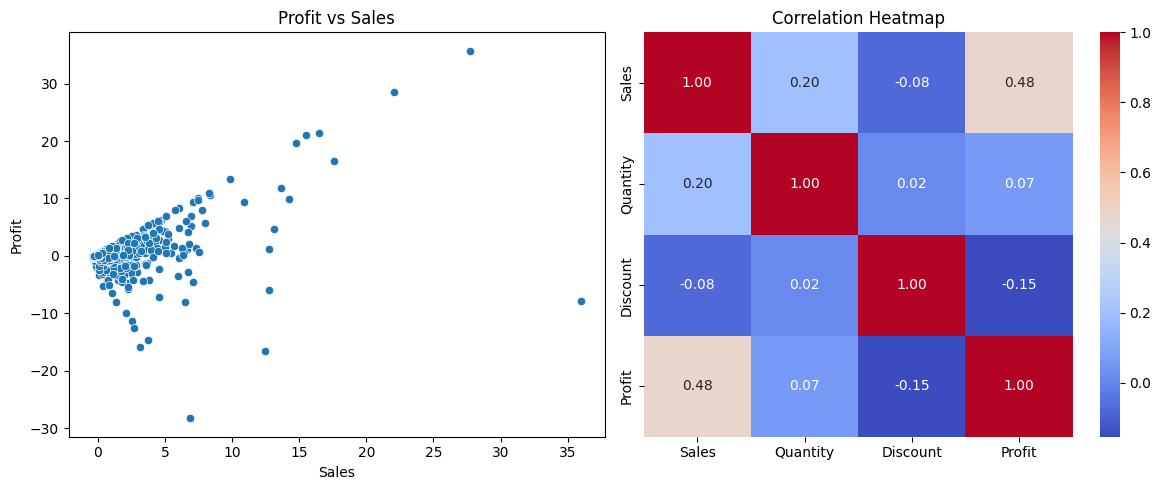


Correlation Matrix:
          Sales  Quantity  Discount  Profit
Sales      1.00      0.20     -0.08    0.48
Quantity   0.20      1.00      0.02    0.07
Discount  -0.08      0.02      1.00   -0.15
Profit     0.48      0.07     -0.15    1.00


In [225]:
#import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create figure with larger size
plt.figure(figsize=(12, 5))

# Subplot 1: Profit vs Sales Scatterplot
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Sales', y='Profit')
plt.title('Profit vs Sales')

# Subplot 2: Correlation Heatmap (numerical columns only)
plt.subplot(1, 2, 2)
numeric_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Print correlation values
print("\nCorrelation Matrix:")
print(corr_matrix.round(2))

Intepretatiom:
Scatter plot 
1. Positive association between sales and profit 

2. Scatterred points reveal non-linear variability in profits

3. Outliers : 
- High sales with relatively low profits 
- Losses across different sales levels


Coorrelation Heat map Analysis

1. Sales and profit - 0.48
 - Moderate  positive correlation
 - High sales generally lead to higher profits but not always.

 2. Sales and Quantity - 0.20
 - Weak positive correlation
 - Higher quantities don't necesary mean proportionally higher sales

 3. Discount and Profit -0.15
 - Weak positive negative correlation
 - High discount slightly reduce profitability

 4. Discount and sales
- Very weak negative correlation
- Discounts don't strongly impact sales volume


In [ ]:
#These are the cols am working with
categorical_columns = ['Segment', 'Region', 'Category']
numerical_columns = ['Sales', 'Quantity', 'Discount']


In [236]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
    ]
)

# Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1.5965662929649007


In [237]:
# Ensemble
from sklearn.ensemble import RandomForestRegressor

# Update the pipeline with RandomForest
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit and evaluate
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf:.4f}')

Random Forest MSE: 1.1393


Model Performance

- Random Forest performed better than Linear Regression
- Lower MSE indicates more accurate predictions
- The improvement suggests non-linear relationships were better captured

Interpretation of MSE = 1.1393

Since data was standardized, this represents variance in standard deviation units
Root MSE ≈ 1.07 standard deviations from true values

In [238]:
#Model Comparison
from sklearn.metrics import mean_absolute_error, r2_score

# For Linear Regression
print("Linear Regression:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}\n")

# For Random Forest
print("Random Forest:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.2f}")


Linear Regression:
MAE: 0.29
R² Score: -0.81

Random Forest:
MAE: 0.19
R² Score: -0.29


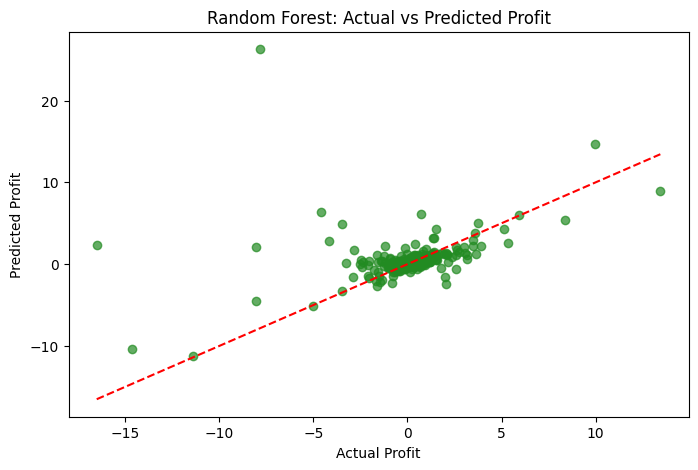

In [239]:
#Visualize the results vs the actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Random Forest: Actual vs Predicted Profit')
plt.show()


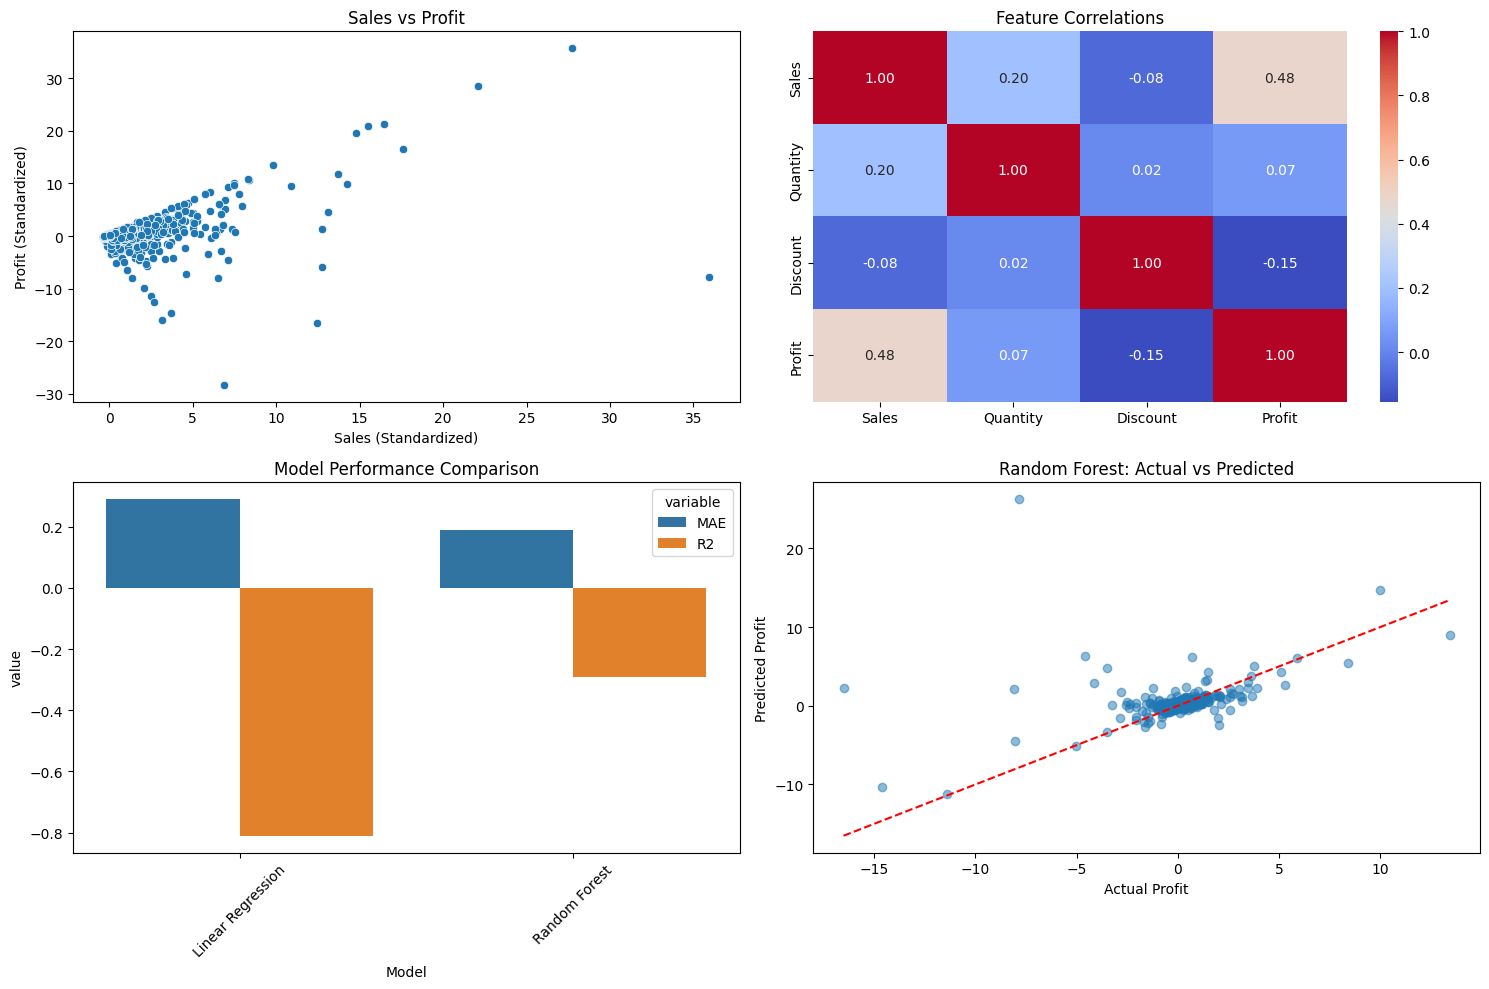

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a figure with subplots
plt.figure(figsize=(15, 10))

# 1. Sales-Profit Relationship
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Sales', y='Profit')
plt.title('Sales vs Profit')
plt.xlabel('Sales (Standardized)')
plt.ylabel('Profit (Standardized)')

# 2. Correlation Heatmap
plt.subplot(2, 2, 2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlations')

# 3. Model Performance Comparison
plt.subplot(2, 2, 3)
metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [0.29, 0.19],
    'R2': [-0.81, -0.29]
})
sns.barplot(data=metrics.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)

# 4. Actual vs Predicted Plot
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')

plt.tight_layout()
plt.savefig('presentation_visuals.png', dpi=300, bbox_inches='tight')
plt.show()